# Decoding Film Success: A Comprehensive Analysis of Directors, Genres, Budgets, and IMDb Scores for Strategic Decision-Making in Film Production

This report aims to provide a comprehensive analysis of the factors influencing the success of films, with a focus on directors, genres, budgets, and IMDb scores. This report aims to provide a comprehensive analysis of the factors influencing the success of films, with a focus on directors, genres, budgets, and IMDb scores. Through a combination of statistical analyses, visualizations, and interpretative summaries, this report aims to provide a robust foundation for informed decision-making in the dynamic and creative realm of film production

In [ ]:

myfile='movie_metadata.csv'
#standard imports for when working with pandas
import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

myfile = 'movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
df.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

In this dataset, we are to study a total of 28 variables. Our focus shall remain on the effect of the rest 27 variables on 'gross' variable.

In [ ]:
#dropping the NaN values
df1=df.dropna()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3756 non-null   object 
 1   director_name              3756 non-null   object 
 2   num_critic_for_reviews     3756 non-null   float64
 3   duration                   3756 non-null   float64
 4   director_facebook_likes    3756 non-null   float64
 5   actor_3_facebook_likes     3756 non-null   float64
 6   actor_2_name               3756 non-null   object 
 7   actor_1_facebook_likes     3756 non-null   float64
 8   gross                      3756 non-null   float64
 9   genres                     3756 non-null   object 
 10  actor_1_name               3756 non-null   object 
 11  movie_title                3756 non-null   object 
 12  num_voted_users            3756 non-null   int64  
 13  cast_total_facebook_likes  3756 non-null   int64

In [ ]:
#Our complete dataset is as follows:
df1

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [ ]:
#Removing the duplicates
df3 = df1.drop_duplicates(subset='movie_imdb_link', keep='first')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3656 non-null   object 
 1   director_name              3656 non-null   object 
 2   num_critic_for_reviews     3656 non-null   float64
 3   duration                   3656 non-null   float64
 4   director_facebook_likes    3656 non-null   float64
 5   actor_3_facebook_likes     3656 non-null   float64
 6   actor_2_name               3656 non-null   object 
 7   actor_1_facebook_likes     3656 non-null   float64
 8   gross                      3656 non-null   float64
 9   genres                     3656 non-null   object 
 10  actor_1_name               3656 non-null   object 
 11  movie_title                3656 non-null   object 
 12  num_voted_users            3656 non-null   int64  
 13  cast_total_facebook_likes  3656 non-null   int64

In [ ]:
df3.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3.656000e+03,3.656000e+03,3656.000000,3656.00000,3656.000000,3.656000e+03,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,164.874179,110.168217,813.340810,754.332330,7671.603118,5.176226e+07,1.046738e+05,11380.025985,1.38512,330.824398,4.575375e+07,2002.905088,1983.463348,6.463512,2.108758,9119.811269
std,122.206020,22.696496,3089.876426,1850.253567,15608.610901,6.922863e+07,1.520401e+05,19113.380630,2.05504,406.032129,2.288247e+08,9.876281,4512.164090,1.057744,0.355556,21346.534075
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.00000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,76.000000,96.000000,11.000000,193.750000,742.000000,7.940690e+06,1.914175e+04,1884.500000,0.00000,108.000000,1.000000e+07,1999.000000,378.000000,5.900000,1.850000,0.000000
50%,136.000000,106.000000,62.000000,434.000000,1000.000000,2.916831e+07,5.300000e+04,3983.500000,1.00000,207.000000,2.500000e+07,2004.000000,680.500000,6.600000,2.350000,208.500000
75%,221.000000,120.000000,234.000000,688.250000,12000.000000,6.646686e+07,1.265345e+05,16095.000000,2.00000,393.250000,5.000000e+07,2010.000000,973.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.00000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [ ]:
print(df3.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [ ]:
# Dropping the columns that might not add any special value to our analysis

df2 = df3.drop([ 'movie_title', 'facenumber_in_poster', 'plot_keywords', 'country', 'movie_imdb_link'], axis=1)

# Display the columns of the DataFrame after dropping the specified column
print(df2.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'num_user_for_reviews', 'language', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')


In [ ]:
df2.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,actor_3_name,num_user_for_reviews,language,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,Wes Studi,3054.0,English,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,Jack Davenport,1238.0,English,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,Stephanie Sigman,994.0,English,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,Joseph Gordon-Levitt,2701.0,English,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,Polly Walker,738.0,English,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [ ]:
df2[df2.gross == df2.gross.max()]["gross"]

0    760505847.0
Name: gross, dtype: float64

In [ ]:
df2[df2.gross == df2.gross.min()]["gross"]

3330    162.0
Name: gross, dtype: float64

The minimum and maximum values of our variable of concern 'gross' indicates the presence of huge variations and possible outliers are detected.

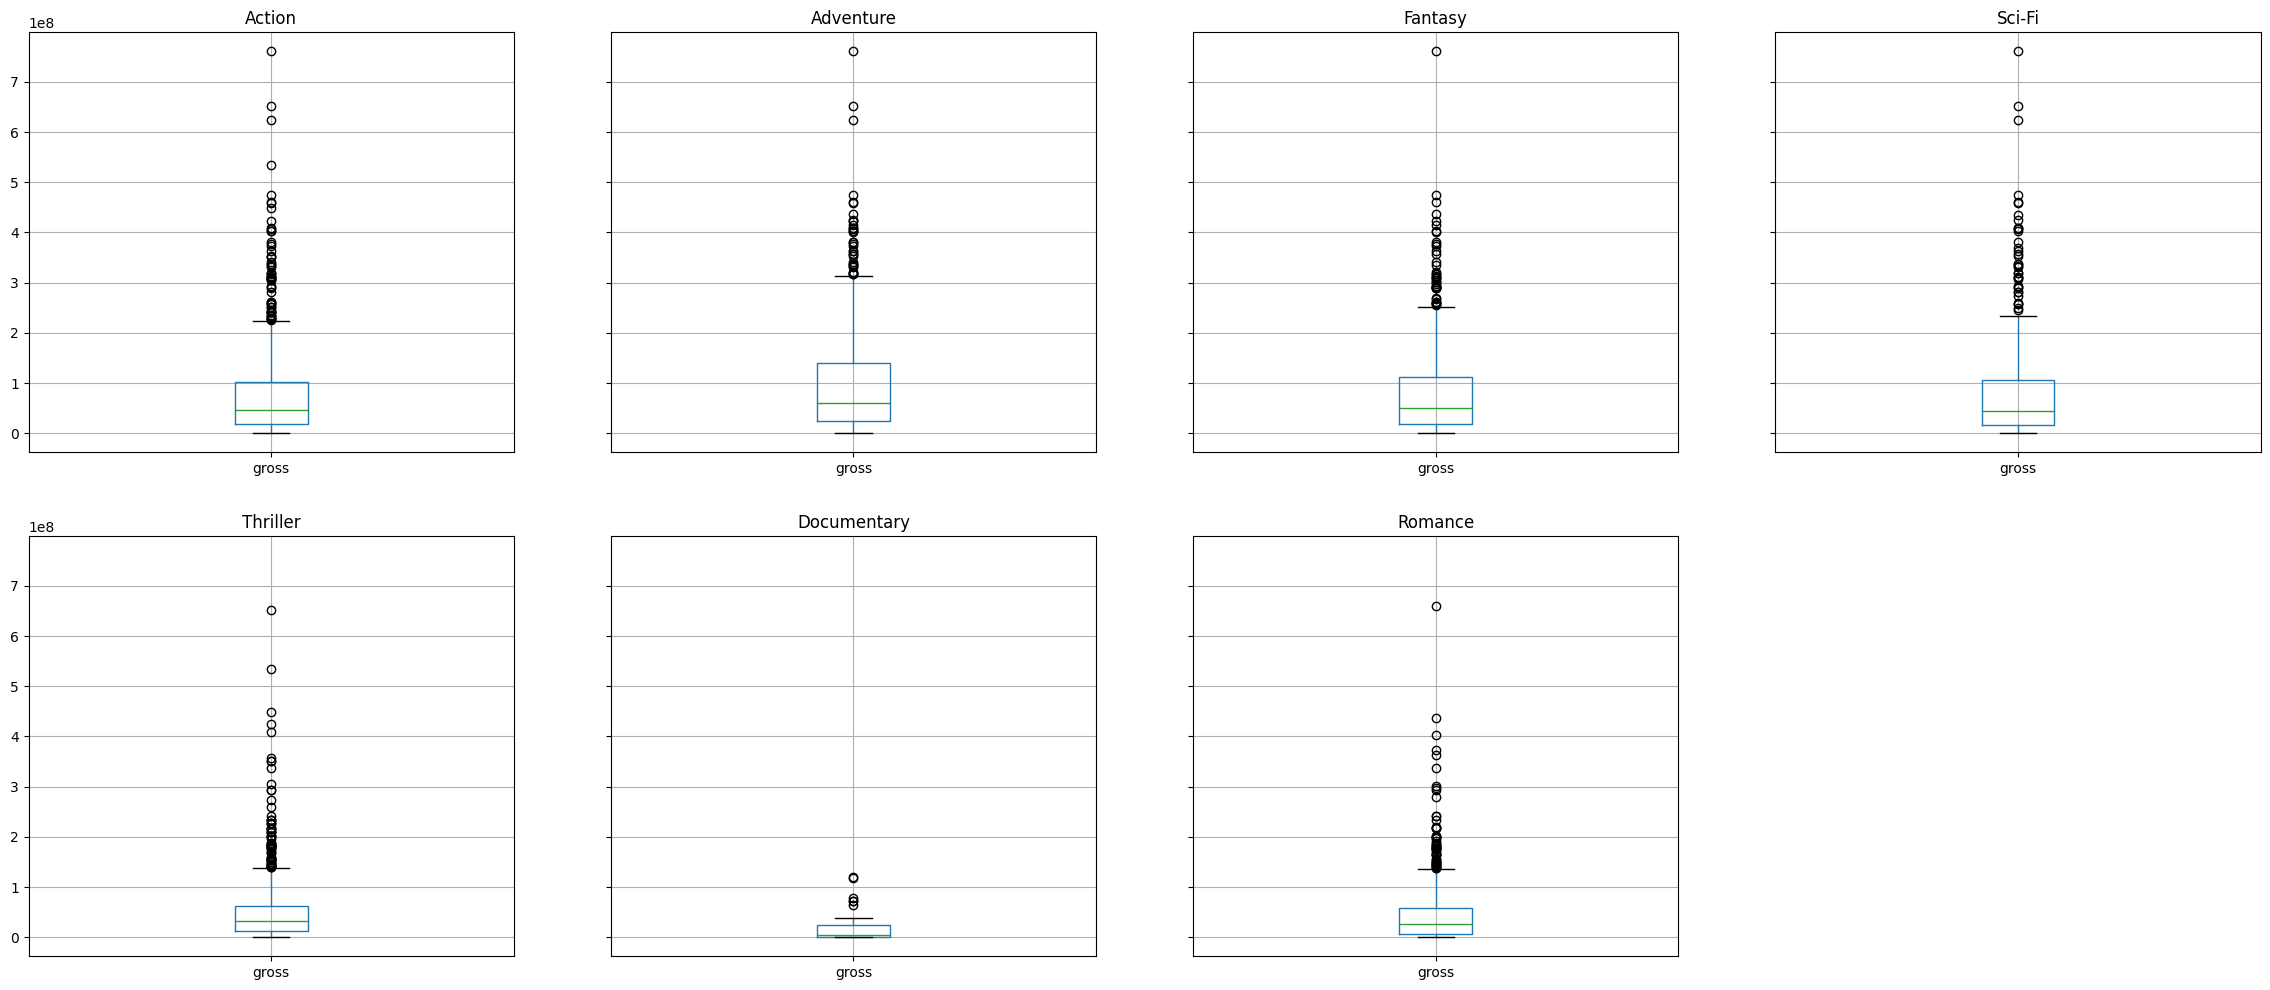

In [ ]:
import matplotlib.pyplot as plt

# Split the genres and create a list of unique genres
unique_genres = df['genres'].str.split('|', expand=True).stack().unique()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True)

# Iterate through each genre and create a boxplot
for idx, (genre, ax) in enumerate(zip(unique_genres, axes.flat)):
    df2_genre = df2[df2['genres'].str.contains(genre)]
    df2_genre.boxplot(column='gross', ax=ax)
    ax.set_title(genre)

# Remove the last subplot
fig.delaxes(axes[1][3])

# Adjust the figure size
fig.set_figwidth(fig.get_figwidth() * 4.5)
fig.set_figheight(fig.get_figheight() * 2.5)

plt.show()

From the above plot it is clear that keeping aside the outliers, majority of the gross is obtained from Adventure, followed by Fantasy, Sci-fi and Action genres, simply meaning, these are the most likely used genres.

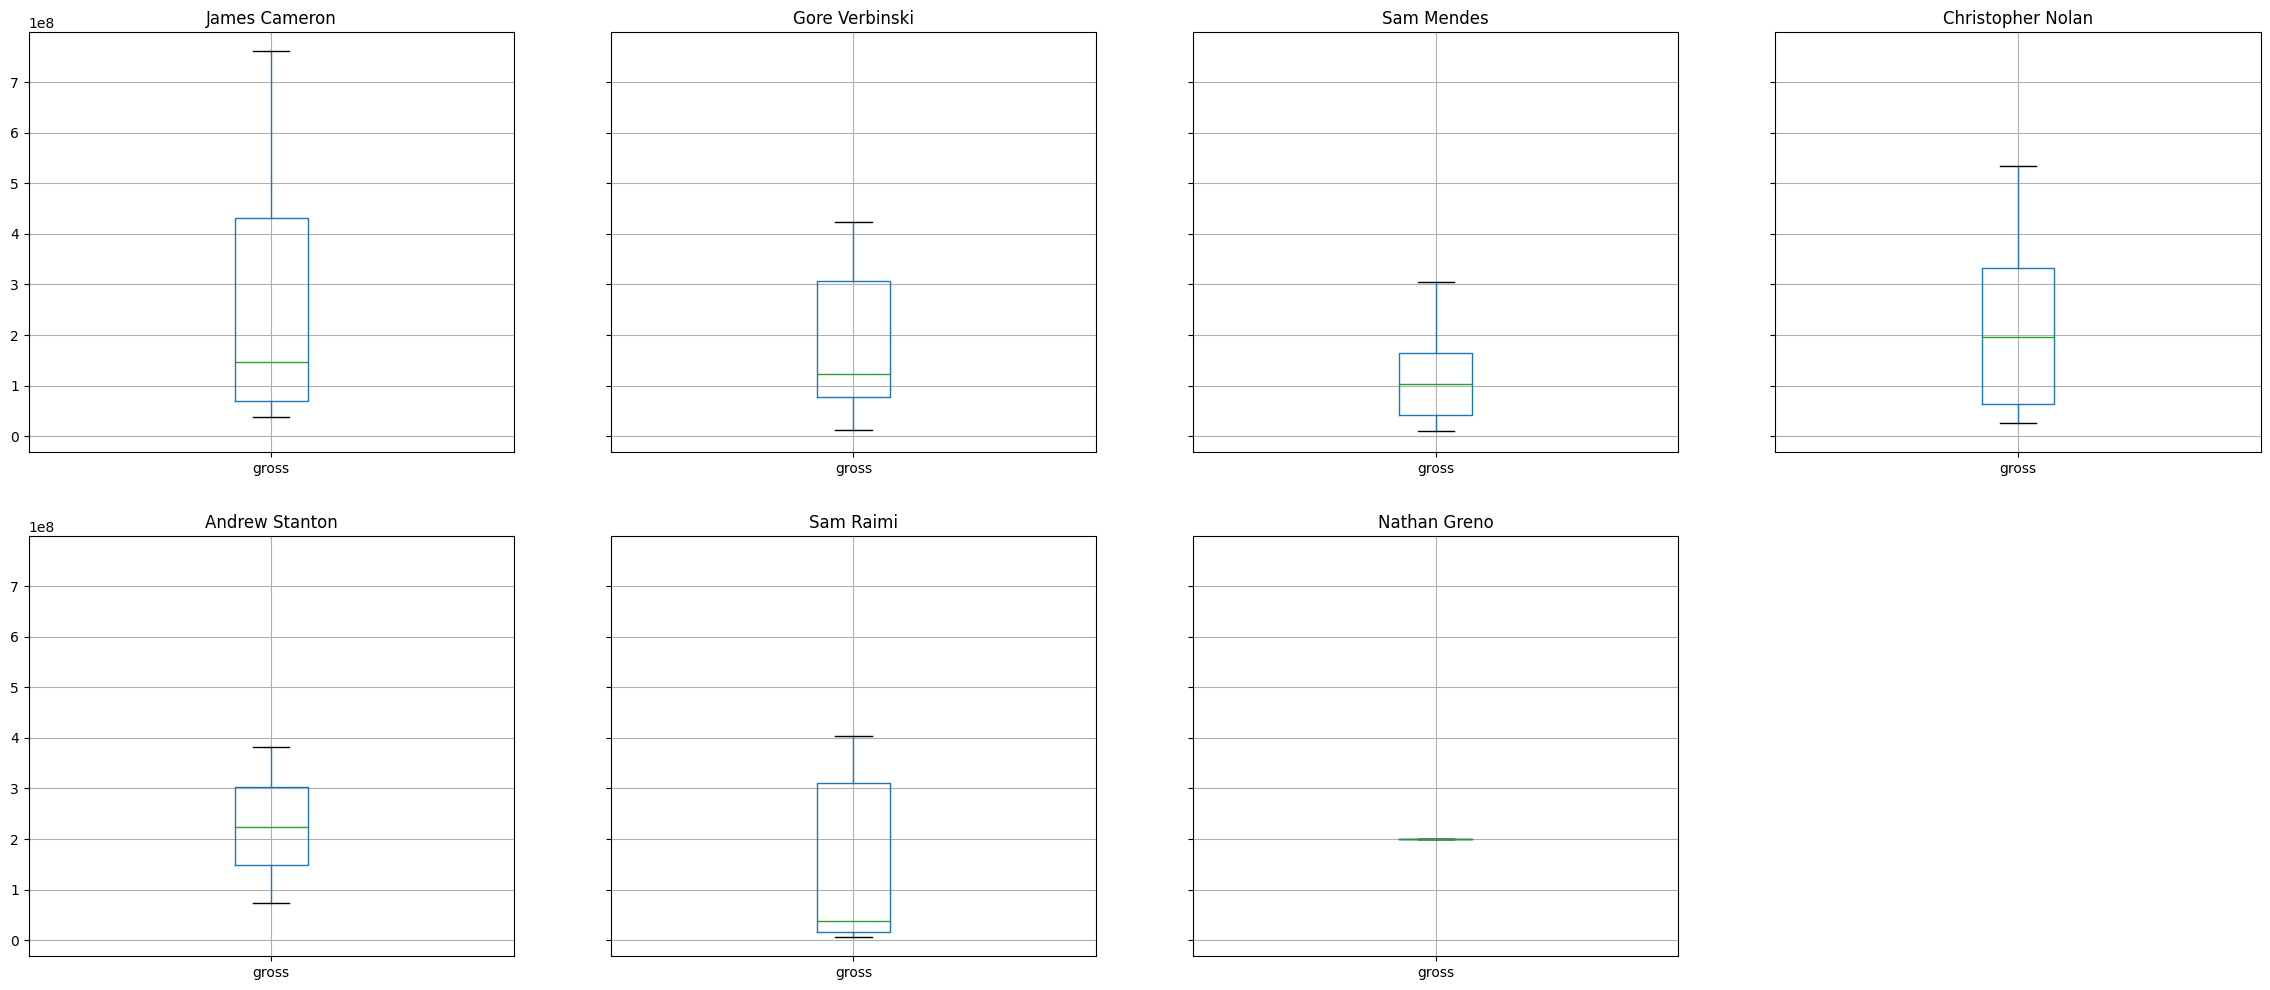

In [ ]:
import matplotlib.pyplot as plt

# Split the genres and create a list of unique genres
unique_directors = df2['director_name'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True)

# Iterate through each director and create a boxplot
for idx, (director, ax) in enumerate(zip(unique_directors, axes.flat)):
    df_director = df2[df2['director_name'] == director]
    df_director.boxplot(column='gross', ax=ax)
    ax.set_title(director)

# Remove the last subplot
fig.delaxes(axes[1][3])

# Adjust the figure size
fig.set_figwidth(fig.get_figwidth() * 4.5)
fig.set_figheight(fig.get_figheight() * 2.5)

plt.show()

The above plots of the list of directors shows that this dataset contains films by James Cameron and Sam Raimi followed by Christopher Nolan having the maximum range of 'gross' value, however, films by Andrew Stanton and Christopher Nolan indicates that their median 'gross' is greater than that of the other directors.

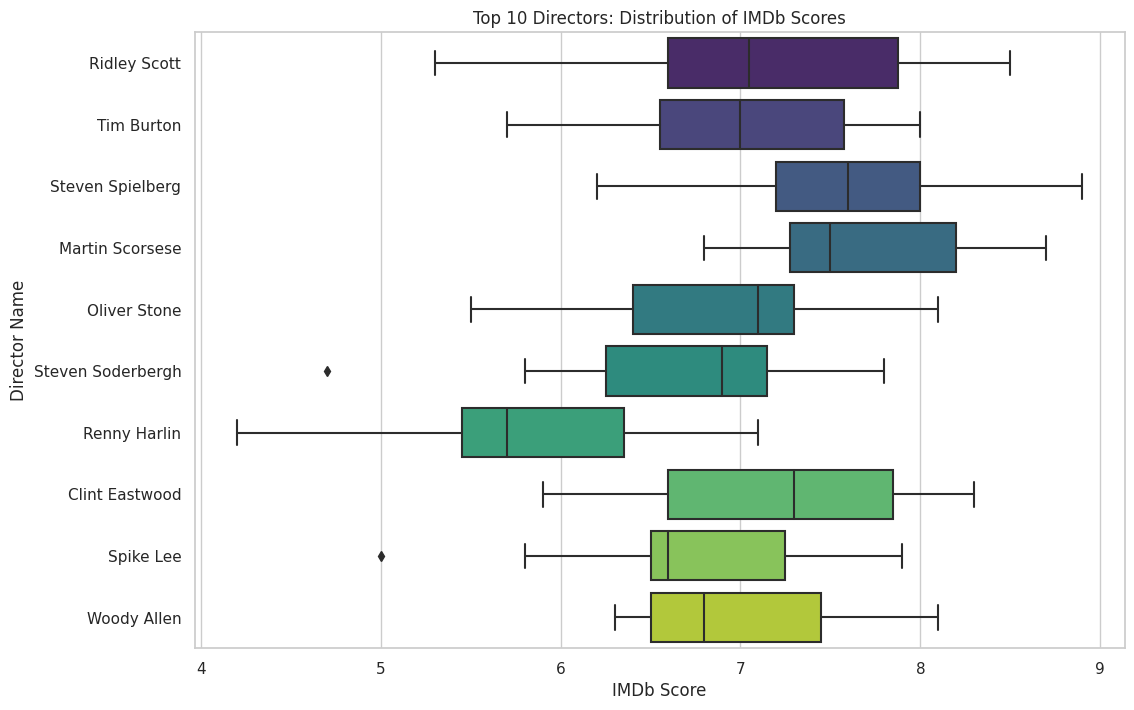

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Specify the number of top directors to display
top_n_directors = 10

# Get the top directors based on the number of films
top_directors = df2['director_name'].value_counts().nlargest(top_n_directors).index

# Filter the DataFrame for the top directors
filtered_df = df2[df2['director_name'].isin(top_directors)]

# Customize the appearance of the boxplot
sns.set(style="whitegrid")
sns.boxplot(x='imdb_score', y='director_name', data=filtered_df, orient='h', palette='viridis')

# Set plot labels and title
plt.xlabel('IMDb Score')
plt.ylabel('Director Name')
plt.title(f'Top {top_n_directors} Directors: Distribution of IMDb Scores')

# Show the plot
plt.show()


Directors play a significant role in influencing IMDb scores. The boxplot analysis for top directors reveals varying distributions of IMDb scores. Notably, directors such as Clint Eastwood and Martin Scorsese have a higher median IMDb score compared to others.

In [ ]:
# Descriptive statistics for IMDb scores by director
director_stats = filtered_df.groupby('director_name')['imdb_score'].describe()
print(director_stats)

                   count      mean       std  min    25%   50%    75%  max
director_name                                                             
Clint Eastwood      19.0  7.205263  0.714511  5.9  6.600  7.30  7.850  8.3
Martin Scorsese     16.0  7.675000  0.581378  6.8  7.275  7.50  8.200  8.7
Oliver Stone        13.0  6.907692  0.754389  5.5  6.400  7.10  7.300  8.1
Renny Harlin        15.0  5.746667  0.781817  4.2  5.450  5.70  6.350  7.1
Ridley Scott        16.0  7.131250  0.952694  5.3  6.600  7.05  7.875  8.5
Spike Lee           15.0  6.733333  0.786190  5.0  6.500  6.60  7.250  7.9
Steven Soderbergh   15.0  6.680000  0.790298  4.7  6.250  6.90  7.150  7.8
Steven Spielberg    25.0  7.544000  0.683179  6.2  7.200  7.60  8.000  8.9
Tim Burton          14.0  7.050000  0.707922  5.7  6.550  7.00  7.575  8.0
Woody Allen         19.0  7.000000  0.564702  6.3  6.500  6.80  7.450  8.1


In [ ]:
# Calculate the average, minimum, and maximum IMDb score
average_imdb_score = df2['imdb_score'].mean()
min_imdb_score = df2['imdb_score'].min()
max_imdb_score = df2['imdb_score'].max()

print("Average IMDb score:", average_imdb_score)
print("Minimum IMDb score:", min_imdb_score)
print("Maximum IMDb score:", max_imdb_score)

Average IMDb score: 6.4635120350109405
Minimum IMDb score: 1.6
Maximum IMDb score: 9.3


We shall henceforth be interested in films having imdb scores greater or equals to 6.4

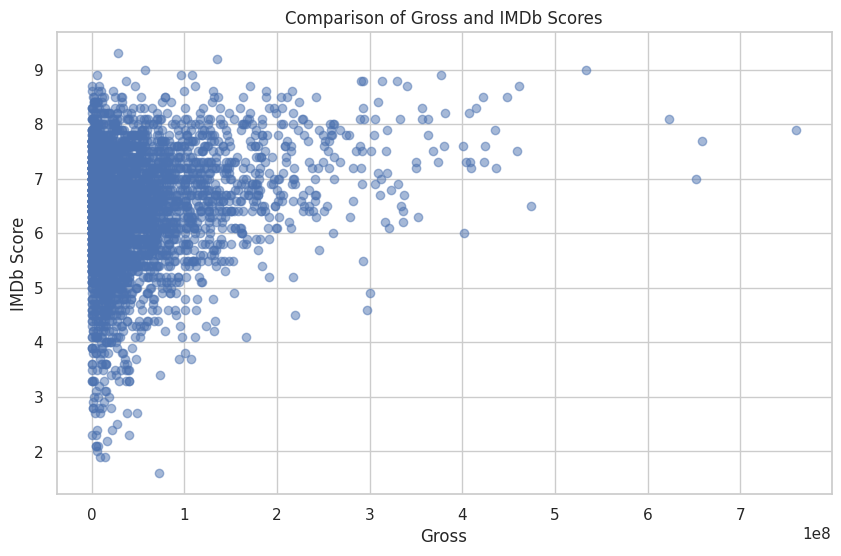

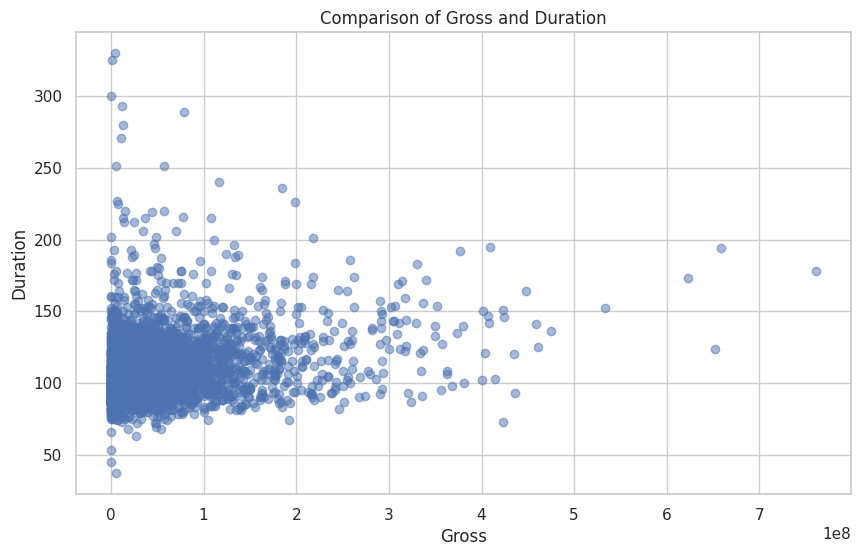

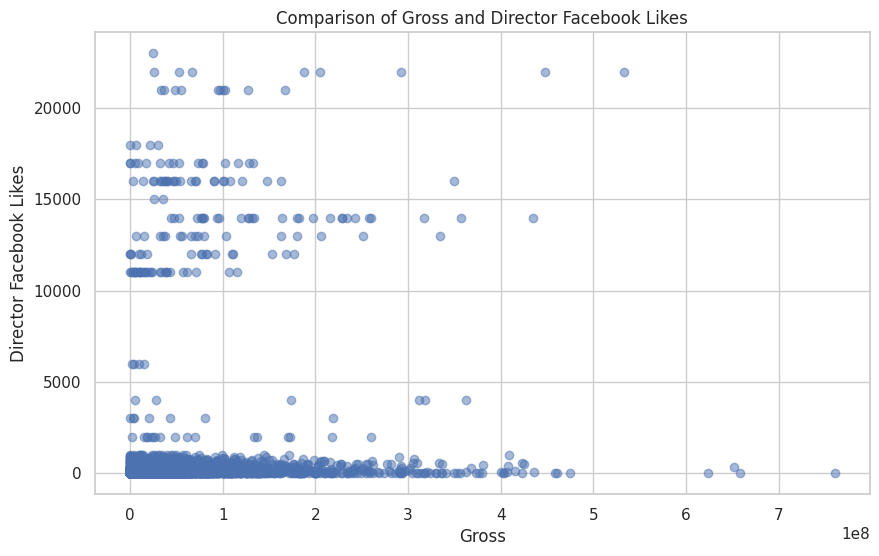

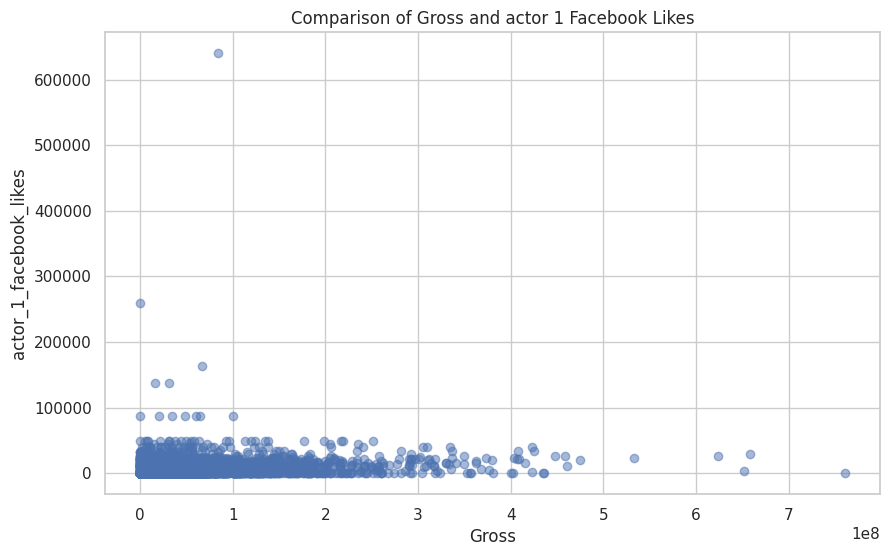

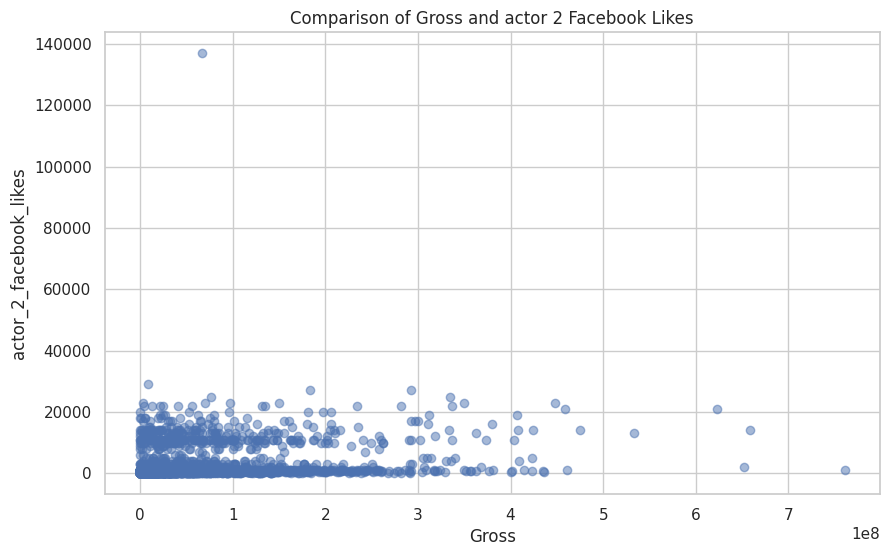

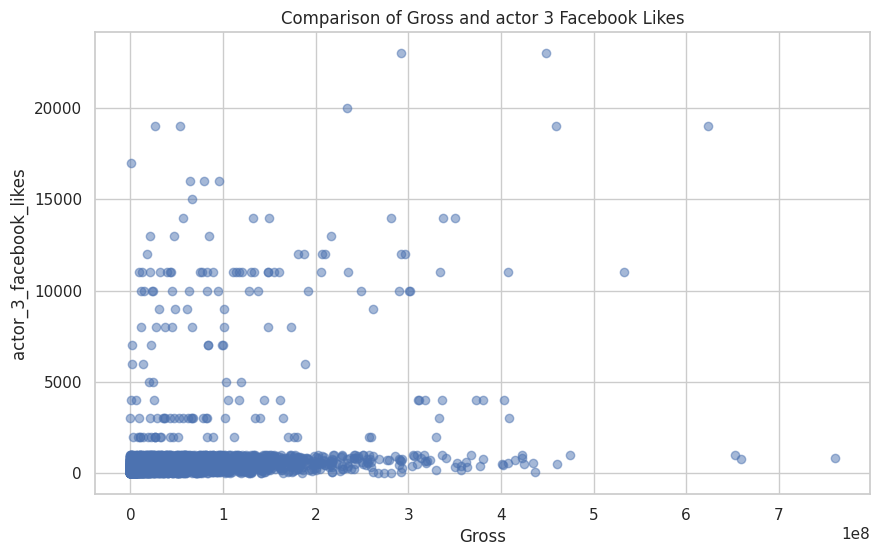

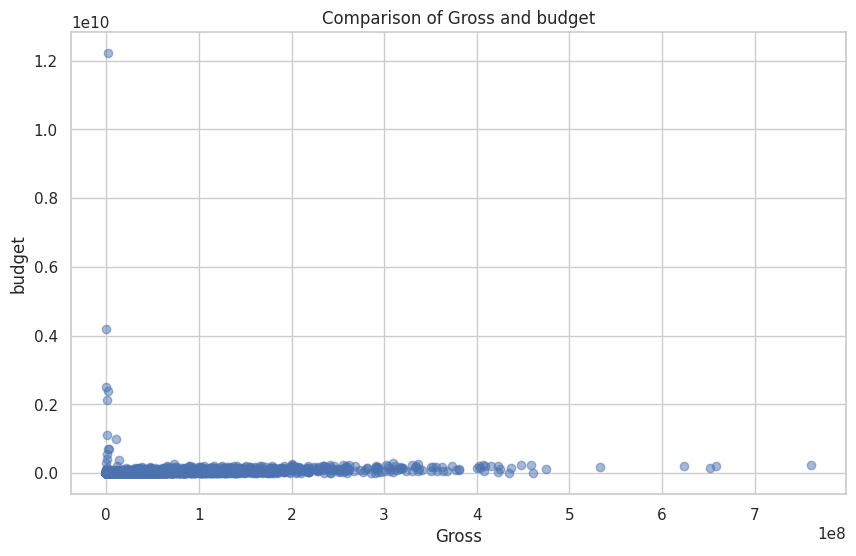

In [ ]:
# Plot the comparison between gross and IMDb scores
plt.figure(figsize=(10, 6))
plt.scatter(df2['gross'], df2['imdb_score'], alpha=0.5)
plt.title('Comparison of Gross and IMDb Scores')
plt.xlabel('Gross')
plt.ylabel('IMDb Score')
plt.show()

# Plot the comparison between gross and duration
plt.figure(figsize=(10, 6))
plt.scatter(df2['gross'], df2['duration'], alpha=0.5)
plt.title('Comparison of Gross and Duration')
plt.xlabel('Gross')
plt.ylabel('Duration')
plt.show()


# Plot the comparison between gross and director Facebook likes
plt.figure(figsize=(10, 6))
plt.scatter(df2['gross'], df2['director_facebook_likes'], alpha=0.5)
plt.title('Comparison of Gross and Director Facebook Likes')
plt.xlabel('Gross')
plt.ylabel('Director Facebook Likes')
plt.show()

# Plot the comparison between gross and 1st actor facebook likes
plt.figure(figsize=(10, 6))
plt.scatter(df2['gross'], df2['actor_1_facebook_likes'], alpha=0.5)
plt.title('Comparison of Gross and actor 1 Facebook Likes')
plt.xlabel('Gross')
plt.ylabel('actor_1_facebook_likes')
plt.show()

# Plot the comparison between gross and 2nd actor facebook likes
plt.figure(figsize=(10, 6))
plt.scatter(df2['gross'], df2['actor_2_facebook_likes'], alpha=0.5)
plt.title('Comparison of Gross and actor 2 Facebook Likes')
plt.xlabel('Gross')
plt.ylabel('actor_2_facebook_likes')
plt.show()

# Plot the comparison between gross and 3rd actor facebook likes
plt.figure(figsize=(10, 6))
plt.scatter(df2['gross'], df2['actor_3_facebook_likes'], alpha=0.5)
plt.title('Comparison of Gross and actor 3 Facebook Likes')
plt.xlabel('Gross')
plt.ylabel('actor_3_facebook_likes')
plt.show()

# Plot the comparison between gross and budget
plt.figure(figsize=(10, 6))
plt.scatter(df2['gross'], df2['budget'], alpha=0.5)
plt.title('Comparison of Gross and budget')
plt.xlabel('Gross')
plt.ylabel('budget')
plt.show()

The above plots show that movies having IMDB scores of around 5.5-8.5, with durations around 75-150 minutes carries most of the gross.
The plots with the 'Facebook likes' displays the spread of 'gross' values with respect to the likes count.

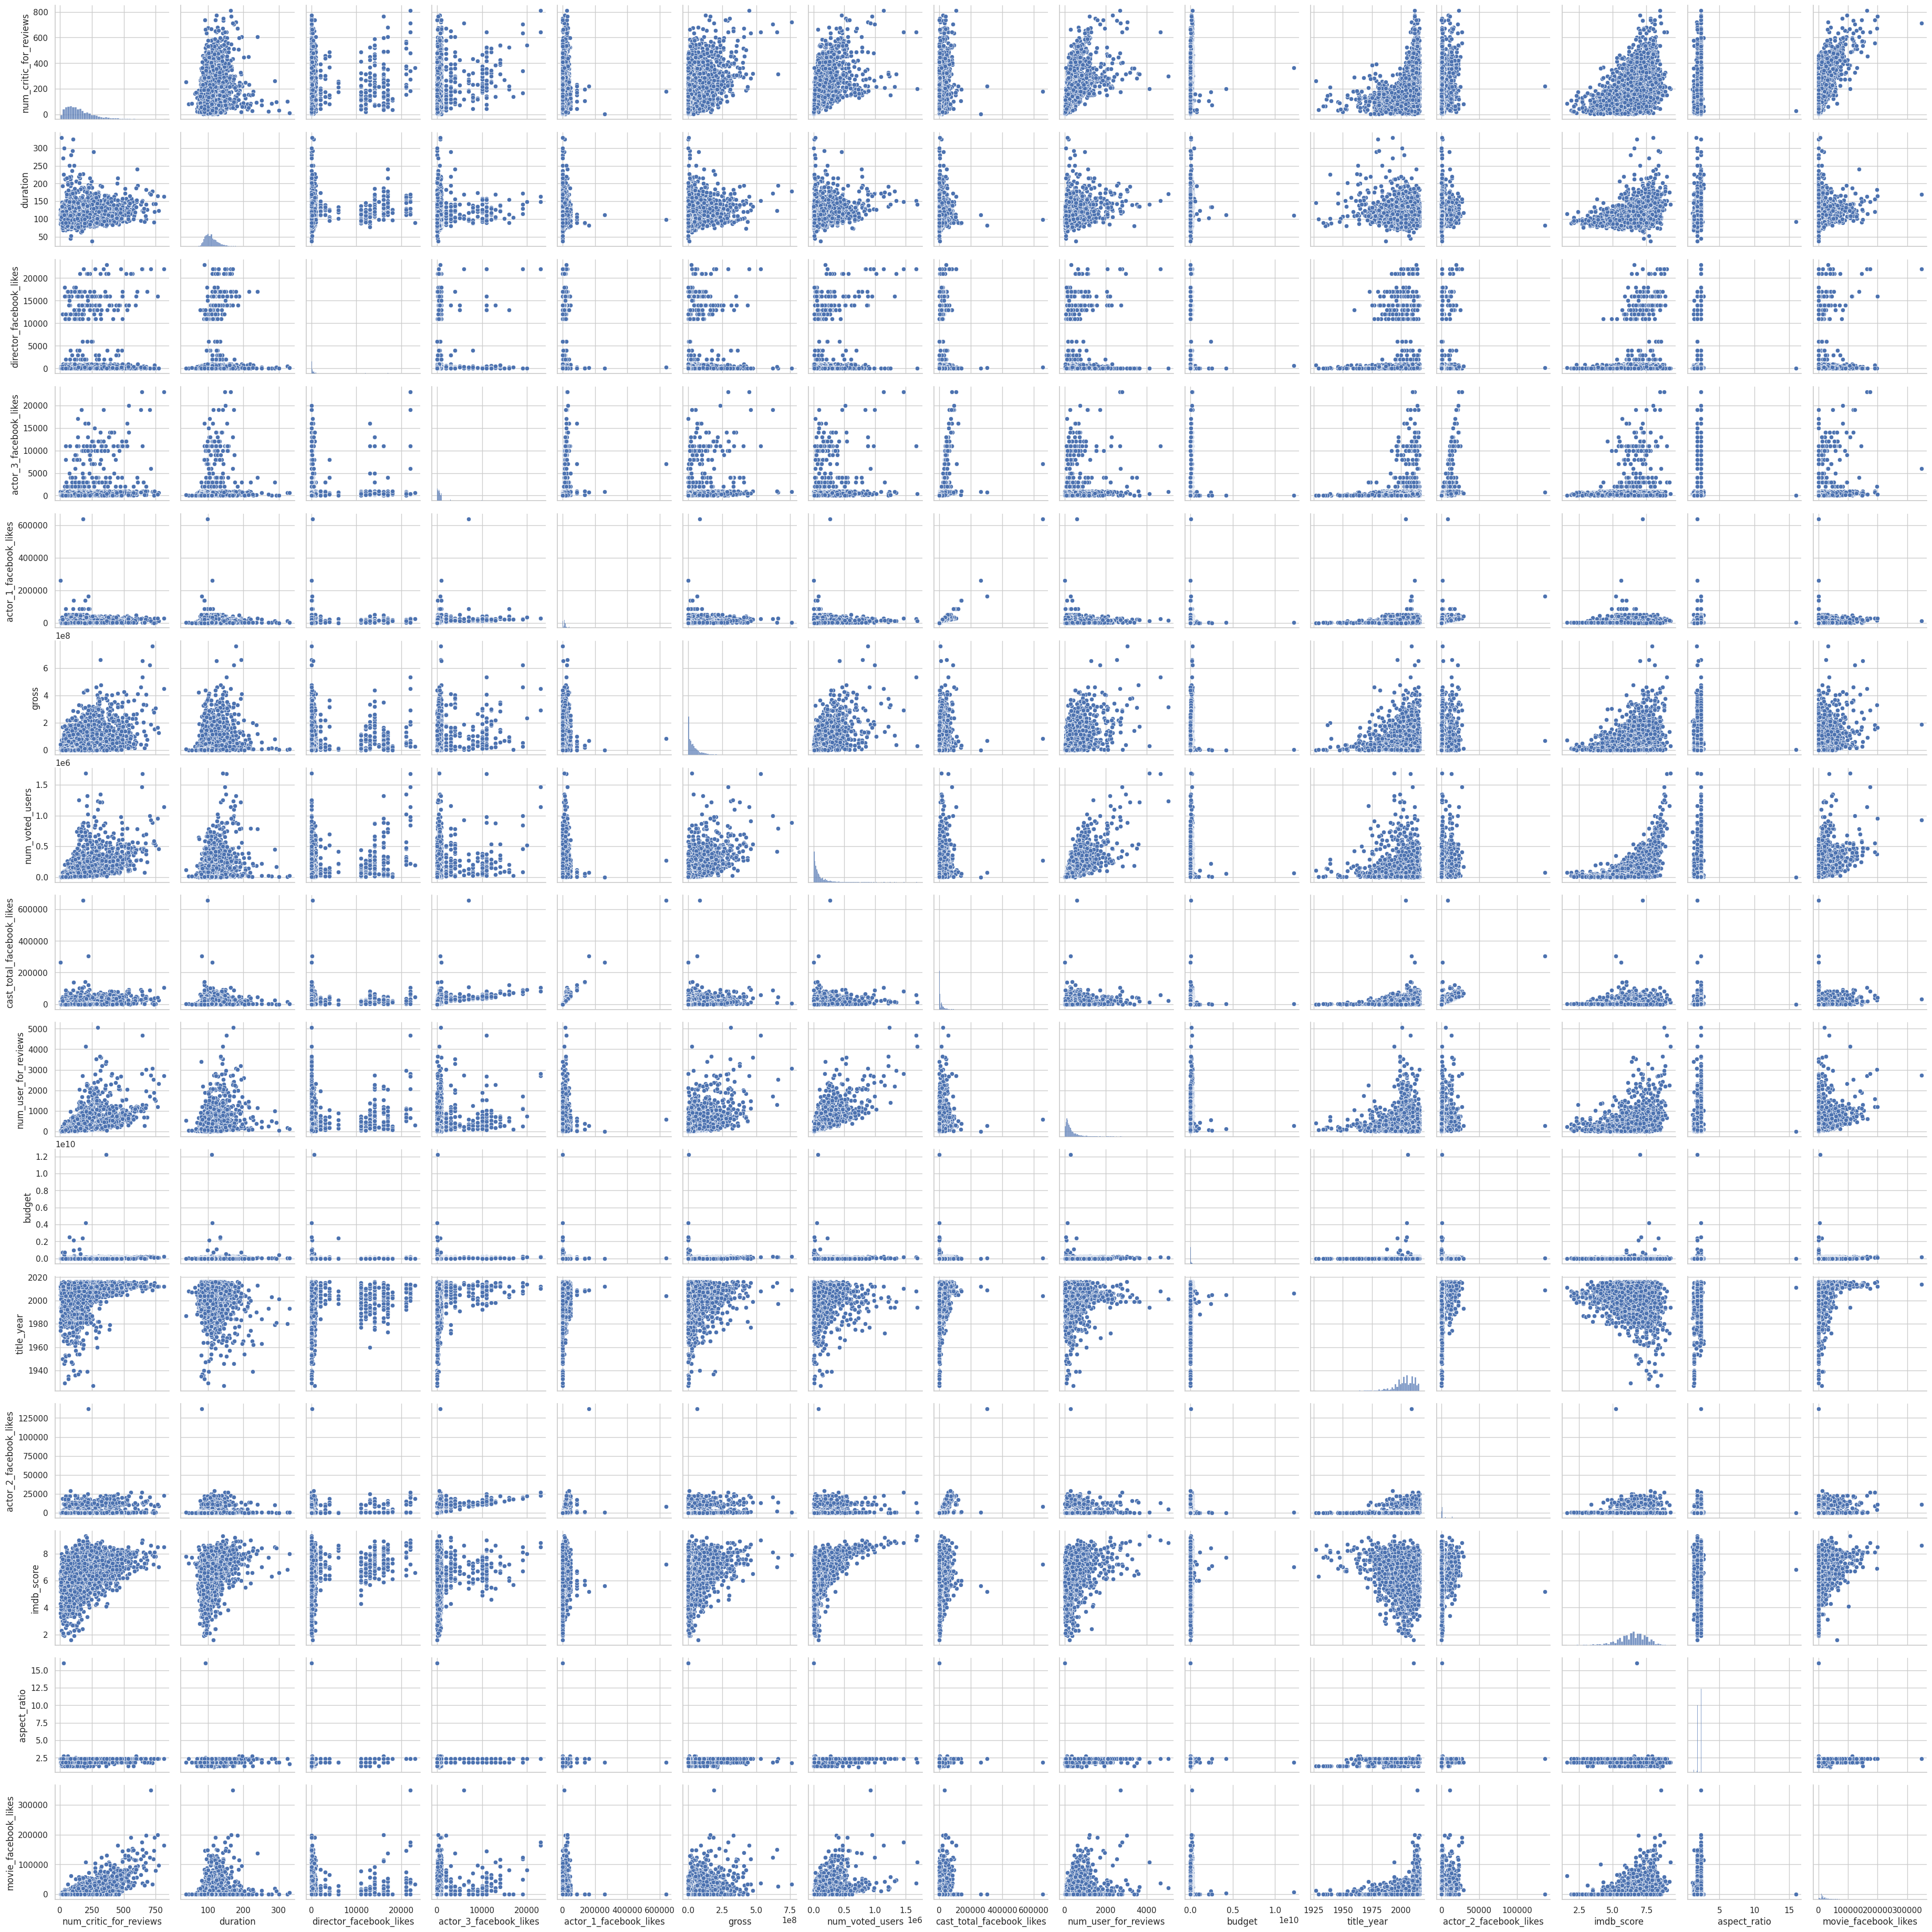

In [ ]:
sns.pairplot(df2)

The diagonal histograms shows the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables compared one at a time.

In this pairplot we can see that there is a positive correlation of 'gross' with number of critics for reviews, number of voted users, title year and imdb score of the movie.

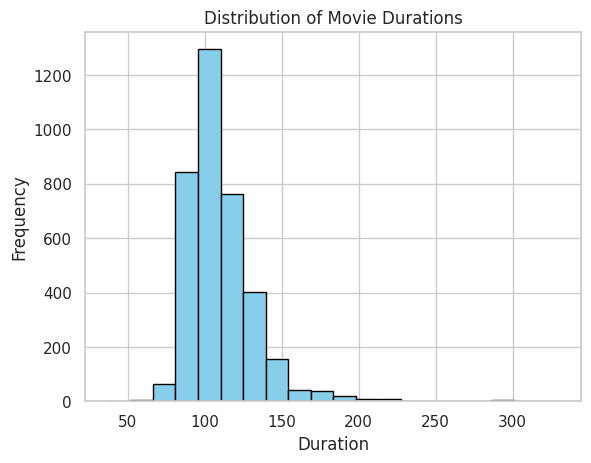

In [ ]:
import matplotlib.pyplot as plt
# Example: Histogram of movie durations
plt.hist(df2['duration'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations')
plt.show()

We are interested in knowing the distribution of duration of the movies.
We observe that the maximum number of movies (more than 1200) have duration around 90-110 minutes, followed by around 850 movies with duration ranging from 80 to < 100 and almost 750 movies having duration of 120-140.

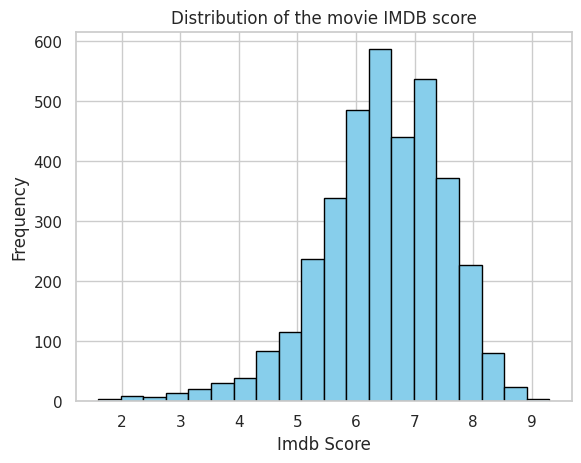

In [ ]:
import matplotlib.pyplot as plt
# Example: Histogram of IMDB scores
plt.hist(df2['imdb_score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Imdb Score')
plt.ylabel('Frequency')
plt.title('Distribution of the movie IMDB score')
plt.show()

In this case, we check the distribution of Imdb scores of the movies. We observe that the majority of movies (nearly 600) have Imdb score approximately 6.2-6.7 or 7-7.3

In [ ]:
# Summary statistics of movie durations, budgets, and IMDB scores
summary_stats = df2[['gross', 'duration', 'budget', 'imdb_score']].describe()
print(summary_stats)


# Exploring the distribution of genres breaking them down to further categories and their impact on IMDB scores
genres = df2['genres'].str.split('|', expand=True).stack().value_counts()
print(genres)

# Calculate average IMDB score for each genre
genre_scores = df2['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
df_genre_scores = df2.join(genre_scores)[['imdb_score', 'genre']]
average_genre_scores = df_genre_scores.groupby('genre').mean()
print(average_genre_scores)

              gross     duration        budget   imdb_score
count  3.656000e+03  3656.000000  3.656000e+03  3656.000000
mean   5.176226e+07   110.168217  4.575375e+07     6.463512
std    6.922863e+07    22.696496  2.288247e+08     1.057744
min    1.620000e+02    37.000000  2.180000e+02     1.600000
25%    7.940690e+06    96.000000  1.000000e+07     5.900000
50%    2.916831e+07   106.000000  2.500000e+07     6.600000
75%    6.646686e+07   120.000000  5.000000e+07     7.200000
max    7.605058e+08   330.000000  1.221550e+10     9.300000
Drama          1846
Comedy         1443
Thriller       1074
Action          924
Romance         839
Adventure       752
Crime           692
Fantasy         486
Sci-Fi          479
Family          431
Horror          374
Mystery         371
Biography       237
Animation       194
Music           149
War             149
History         146
Sport           143
Musical          95
Western          57
Documentary      45
Film-Noir         1
dtype: int64
       

From the above output we observe that on average, movies have a duration of around 110 minutes, a gross of approximately 51 million dollars, a budget of around 45 million dollars, and an IMDb score of 6.46. Some genres, such as Film-Noir, Biography, and History, tend to have higher average IMDb scores, while Horror movies have a slightly lower average score.

In [ ]:
# Hypothesis 1: Higher movie budget is associated with higher IMDB scores
budget_hypothesis = df2[['budget', 'imdb_score']].dropna()
budget_correlation = budget_hypothesis['budget'].corr(budget_hypothesis['imdb_score'])
print("Correlation between budget and IMDB score:", budget_correlation)

# Hypothesis 2: Action movies have higher IMDB scores compared to other genres
action_movies = df2[df2['genres'].str.contains('Action', na=False)]
non_action_movies = df2[~df2['genres'].str.contains('Action', na=False)]
action_mean_score = action_movies['imdb_score'].mean()
non_action_mean_score = non_action_movies['imdb_score'].mean()
print("Mean IMDB score for action movies:", action_mean_score)
print("Mean IMDB score for non-action movies:", non_action_mean_score)

# Hypothesis 3: There is a positive relationship between director Facebook likes and IMDB scores
director_likes_hypothesis = df2[['director_facebook_likes', 'imdb_score']].dropna()
director_likes_correlation = director_likes_hypothesis['director_facebook_likes'].corr(director_likes_hypothesis['imdb_score'])
print("Correlation between director Facebook likes and IMDB score:", director_likes_correlation)

Correlation between budget and IMDB score: 0.02962186517703622
Mean IMDB score for action movies: 6.285064935064935
Mean IMDB score for non-action movies: 6.523865300146413
Correlation between director Facebook likes and IMDB score: 0.19588428360389518


The weak correlation in Hypothesis 1 implies that, within this dataset, the budget of a movie has a limited impact on its IMDb score.
Hypothesis 2 indicates that, on average, non-action movies have slightly higher IMDb scores than action movies in this dataset.
Hypothesis 3 suggests a weak positive association between the number of director Facebook likes and IMDb scores.

In [ ]:
genreseries=df2.groupby('genres')[['imdb_score','budget']].mean()
#set the minimum imdb score that I care about to 7.5
min_imdb_score=7.5
top_rated_genre = genreseries[genreseries['imdb_score']>min_imdb_score]
top_rated_genre = top_rated_genre.sort_values('imdb_score', ascending=False)
#print the genres for inspection
top_rated_genre.head()

,imdb_score,budget
genres,,
Adventure|Animation|Drama|Family|Musical,8.5,4.500000e+07
Crime|Drama|Fantasy|Mystery,8.5,6.000000e+07
Adventure|Animation|Fantasy,8.4,2.400000e+09
Adventure|Drama|Thriller|War,8.4,1.400000e+07
Biography|Drama|History|Music,8.3,1.800000e+07


This information gives us insights into the top-rated genres based on IMDb scores, considering a minimum IMDb score of 7.5

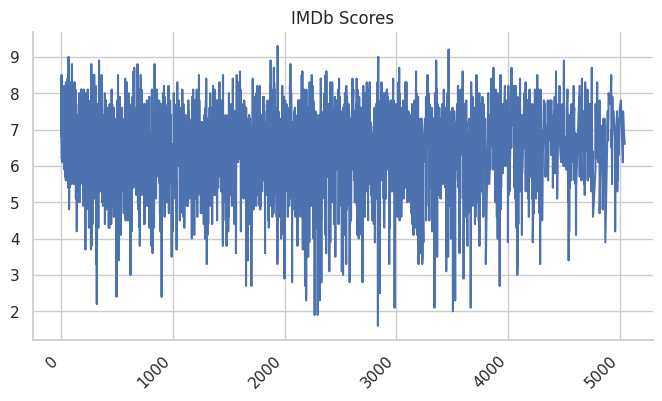

In [ ]:
from matplotlib import pyplot as plt

df2['imdb_score'].plot(kind='line', figsize=(8, 4), title='IMDb Scores')
plt.gca().spines[['top', 'right']].set_visible(False)

# Adjusting x-axis ticks
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

plt.show()


In [ ]:
proposed_budget_range = (1000000, 50000000)  # Adjust the budget range as needed

# Filter data within the proposed budget range
filtered_data = df2[(df2['budget'] >= proposed_budget_range[0]) & (df2['budget'] <= proposed_budget_range[1])]

# Group data by genre and calculate mean IMDb score
genre_means = filtered_data.groupby('genres')['imdb_score'].mean().reset_index()

# Sort genres based on mean IMDb score in descending order
sorted_genres = genre_means.sort_values('imdb_score', ascending=False)

# Display the sorted genres
print(sorted_genres)


                                       genres  imdb_score
31                     Action|Adventure|Drama         8.7
187  Adventure|Animation|Drama|Family|Musical         8.5
254              Adventure|Drama|Thriller|War         8.4
324             Biography|Drama|History|Music         8.3
533                         Drama|Mystery|War         8.2
..                                        ...         ...
49            Action|Adventure|Fantasy|Horror         2.9
124                       Action|Crime|Sci-Fi         2.8
353                Comedy|Crime|Family|Sci-Fi         2.5
166                              Action|Sport         2.1
409                      Comedy|Family|Sci-Fi         1.9

[576 rows x 2 columns]


The list encompasses a diverse range of genres, such as adventure, drama, biography, mystery, and war. This indicates that movies from various genres can achieve high IMDb scores within the specified budget range.

In [ ]:
df2[df2['genres']=='Action|Adventure|Drama']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,actor_3_name,num_user_for_reviews,language,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
159,Color,Ridley Scott,314.0,150.0,0.0,748.0,María Valverde,23000.0,65007045.0,Action|Adventure|Drama,...,Ben Mendelsohn,657.0,English,PG-13,140000000.0,2014.0,893.0,6.1,2.35,51000
193,Color,Darren Aronofsky,434.0,138.0,0.0,8000.0,Emma Watson,12000.0,101160529.0,Action|Adventure|Drama,...,Logan Lerman,1240.0,English,PG-13,125000000.0,2014.0,9000.0,5.8,1.85,71000
4747,Black and White,Akira Kurosawa,153.0,202.0,0.0,4.0,Minoru Chiaki,304.0,269061.0,Action|Adventure|Drama,...,Kamatari Fujiwara,596.0,Japanese,Unrated,2000000.0,1954.0,8.0,8.7,1.37,11000


In [ ]:
proposed_budget = 50000000  # Adjust the budget criterion as needed
min_imdb_rating = 7.5  # Adjust the IMDb rating criterion as needed

# Filter data based on budget and IMDb rating criteria
selected_films = df2[(df2['budget'] <= proposed_budget) & (df2['imdb_score'] >= min_imdb_rating)]

# Display details of selected films
print(selected_films[['director_name', 'genres', 'budget', 'imdb_score']])


           director_name                                    genres  \
504       Jacques Perrin                         Documentary|Drama   
509         Roger Allers  Adventure|Animation|Drama|Family|Musical   
694           Tom Tykwer                       Crime|Drama|Fantasy   
706    Quentin Tarantino      Crime|Drama|Mystery|Thriller|Western   
855    Quentin Tarantino                                    Action   
...                  ...                                       ...   
4973    Darren Aronofsky                    Drama|Mystery|Thriller   
4997  David Gordon Green                                     Drama   
4998        Kevin Jordan                            Comedy|Romance   
5008         Kevin Smith                                    Comedy   
5027        Jafar Panahi                                     Drama   

          budget  imdb_score  
504   40000000.0         7.8  
509   45000000.0         8.5  
694   50000000.0         7.5  
706   44000000.0         7.9  
855 

The output provides a glimpse of films meeting specified budget and IMDb rating criteria, showcasing diversity in genres, directors, and budget ranges.
For instance:
Film directed by Jacques Perrin with genres Documentary|Drama, a budget of 40 million dollars, and an IMDb score of 7.8.
Film directed by Roger Allers with genres Adventure|Animation|Drama|Family|Musical, a budget of 45 million dollars, and an IMDb score of 8.5.
Film directed by Quentin Tarantino with genres Crime|Drama|Mystery|Thriller|Western, a budget of 44 million dollars, and an IMDb score of 7.9.

# Summary

Based on the analysis of genres with high IMDb scores within the proposed budget range, it is recommended that the studio consider exploring genres such as "Action|Adventure|Drama," "Adventure|Animation|Drama|Family|Musical," and "Adventure|Drama|Thriller|War."

The correlation between movie budgets and IMDb scores is minimal (correlation coefficient: 0.0296). This suggests that higher budgets do not necessarily guarantee higher IMDb scores. Other factors, such as genre and director influence, play crucial roles.

Top directors, including Clint Eastwood, Martin Scorsese, and Steven Spielberg, exhibit distinct patterns in IMDb scores. Clint Eastwood, for example, maintains a consistently high mean IMDb score of 7.21 across 19 films. While Martin Scorsese tends to achieve consistently high scores, directors like Ridley Scott and Spike Lee show a broader range in their film reception.

Considerations for director selection, genre preferences, and market-specific strategies should be integral to the decision-making process.